Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegressionCV
import xgboost as xgb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


%matplotlib inline

Importing the dataset

In [2]:
train_values = pd.read_csv('./dataset/train_values.csv')
train_labels = pd.read_csv('./dataset/train_labels.csv')
test_values = pd.read_csv('./dataset/test_values.csv')
submission = pd.read_csv('./dataset/submission_format.csv')

Understanding the dataset

In [3]:
train_values.shape

(260601, 39)

In [4]:
test_values.shape

(86868, 39)

In [5]:
train_values.head().transpose()

,0,1,2,3,4
building_id,802906,28830,94947,590882,201944
geo_level_1_id,6,8,21,22,11
geo_level_2_id,487,900,363,418,131
geo_level_3_id,12198,2812,8973,10694,1488
count_floors_pre_eq,2,2,2,2,3
age,30,10,10,10,30
area_percentage,6,8,5,6,8
height_percentage,5,7,5,5,9
land_surface_condition,t,o,t,t,t
foundation_type,r,r,r,r,r


In [6]:
train_values.dtypes

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

Dataset Preprocessing

Check for missing, NaN values

In [7]:
train_values.isnull().values.any()
train_labels.isnull().values.any()

#The dataset contains no missing values.

False

Check for Outliers

Converting categorical variables into Numeric form

In [8]:
#Columns with categorical data
num_cols = train_values._get_numeric_data().columns
categories = list(set(train_values.columns) - set(num_cols))
categories

['legal_ownership_status',
 'land_surface_condition',
 'position',
 'roof_type',
 'plan_configuration',
 'foundation_type',
 'ground_floor_type',
 'other_floor_type']

In [9]:
for i in categories:
    print(i, set(train_values[i]))

legal_ownership_status {'w', 'r', 'a', 'v'}
land_surface_condition {'o', 'n', 't'}
position {'o', 'j', 's', 't'}
roof_type {'x', 'q', 'n'}
plan_configuration {'d', 'f', 'a', 'c', 'o', 'm', 'n', 'q', 's', 'u'}
foundation_type {'r', 'i', 'w', 'h', 'u'}
ground_floor_type {'f', 'x', 'm', 'v', 'z'}
other_floor_type {'x', 'q', 'j', 's'}


In [10]:
#One hot Encodings
train_values_new = pd.get_dummies(train_values)
test_values_new = pd.get_dummies(test_values)

print('Training dataset :',train_values_new.shape)
print()
print('Test dataset :',test_values_new.shape)

Training dataset : (260601, 69)

Test dataset : (86868, 69)


In [11]:
#Factors Method

#Preparing Training Data
df = train_values
for col_name in categories:
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes
print("Train Data Shape: ", df.shape)

#Preparing Test Data
df_test = test_values
for col_name in categories:
        df_test[col_name]= df_test[col_name].astype('category')
        df_test[col_name] = df_test[col_name].cat.codes
print("Test Data Shape: ", df_test.shape)

Train Data Shape:  (260601, 39)
Test Data Shape:  (86868, 39)


Basic Summary Statistic

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
building_id,260601.0,525675.482773,304544.999032,4.0,261190.0,525757.0,789762.0,1052934.0
geo_level_1_id,260601.0,13.900353,8.033617,0.0,7.0,12.0,21.0,30.0
geo_level_2_id,260601.0,701.074685,412.710734,0.0,350.0,702.0,1050.0,1427.0
geo_level_3_id,260601.0,6257.876148,3646.369645,0.0,3073.0,6270.0,9412.0,12567.0
count_floors_pre_eq,260601.0,2.129723,0.727665,1.0,2.0,2.0,2.0,9.0
age,260601.0,26.535029,73.565937,0.0,10.0,15.0,30.0,995.0
area_percentage,260601.0,8.018051,4.392231,1.0,5.0,7.0,9.0,100.0
height_percentage,260601.0,5.434365,1.918418,2.0,4.0,5.0,6.0,32.0
land_surface_condition,260601.0,1.695427,0.696040,0.0,2.0,2.0,2.0,2.0
foundation_type,260601.0,2.119036,0.579154,0.0,2.0,2.0,2.0,4.0


Exploratory Data Analysis

Text(0.5, 1.0, 'Number of Buildings with Each Damage Grade')

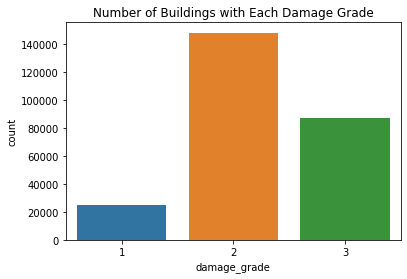

In [13]:
#On plotting a bar plot for each damage grade, we observe that the data is imbalanced.

sns.countplot(train_labels['damage_grade'])
plt.title('Number of Buildings with Each Damage Grade')

In [14]:
print(len(set(df['geo_level_1_id'])), 
len(set(df['geo_level_2_id'])), 
len(set(df['geo_level_3_id'])))

31 1414 11595


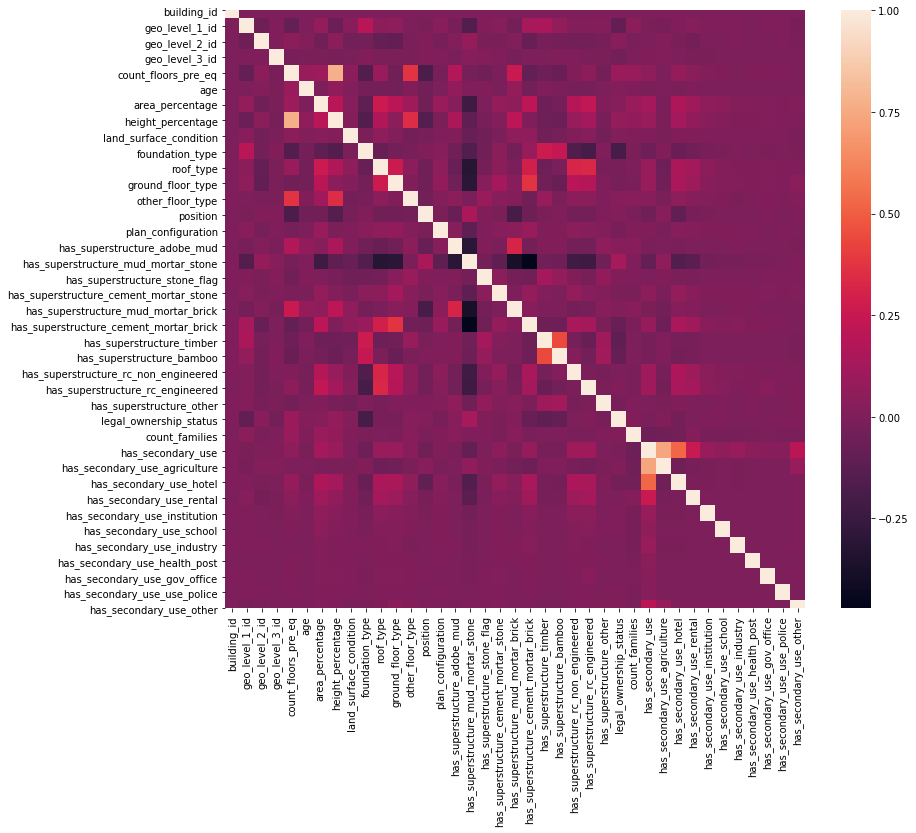

In [15]:
plt.figure(figsize=(13,11))
data_corr = train_values.corr()
sns.heatmap(data_corr)
plt.show();

In [16]:
# for i in df.columns:
#     #df.hist(column=i, bins=10)
#     sns.distplot(df[i])
#     plt.show()

In [17]:
#sns.pairplot(df);

Basic Models:
1. Logistic Regression
2. Random Forest
3. xgBoost

In [18]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df, train_labels['damage_grade'], test_size=0.3) # 70% training and 30% test

print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(182420, 39)
(78181, 39)
(78181,)
(182420,)


In [19]:
def print_confusion_matrix(y_train, y_pred):
    cm = confusion_matrix(y_train, y_pred)
    df_cm = pd.DataFrame(cm, range(3), range(3))
    df_cm = pd.DataFrame(cm, columns=np.unique(y_train), index = np.unique(y_train))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize = (10,7))
    sns.set(font_scale=1.4)#for label size
    ax = sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size
    ax.get_ylim()
    ax.set_ylim(3.0, 0)

In [20]:
#Interactive Plot

# !pip -q install pygal
# import pygal
# from IPython.display import display, HTML
# from pygal.style import RedBlueStyle

# base_html = """
# <!DOCTYPE html>
# <html>
#   <head>
#   <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
#   <script type="text/javascript" src="https://kozea.github.io/pygal.js/2.0.x/pygal-tooltips.min.js""></script>
#   </head>
#   <body>
#     <figure>
#       {rendered_chart}
#     </figure>
#   </body>
# </html>
# """

# def galplot(chart):
#     rendered_chart = chart.render(is_unicode=True)
#     plot_html = base_html.format(rendered_chart=rendered_chart)
#     display(HTML(plot_html))
# def plot_cm(y_true, y_pred):
#     labels = np.unique(y_true)
#     cm = confusion_matrix(y_true, y_pred, labels=labels)
#     dot_chart = pygal.Dot(x_label_rotation=30, interpolate='cubic', style=RedBlueStyle)
#     dot_chart.title = 'Confusion Matrix'
#     dot_chart.x_labels = labels
#     dot_chart.x_title = "Predicted"
#     dot_chart.y_title = "Actual"
#     for i in range(len(labels)):
#         dot_chart.add(labels[i], cm[i,:])
#     galplot(dot_chart)
    
# plot_cm(y_true, y_pred)

Logistic Regression

In [21]:
clf = LogisticRegression(random_state=1, solver='lbfgs', 
                         multi_class='multinomial').fit(X_train, y_train)

In [22]:
predicted_labels = clf.predict(X_test)

clf.score(X_test, y_test)

0.56868036991084792

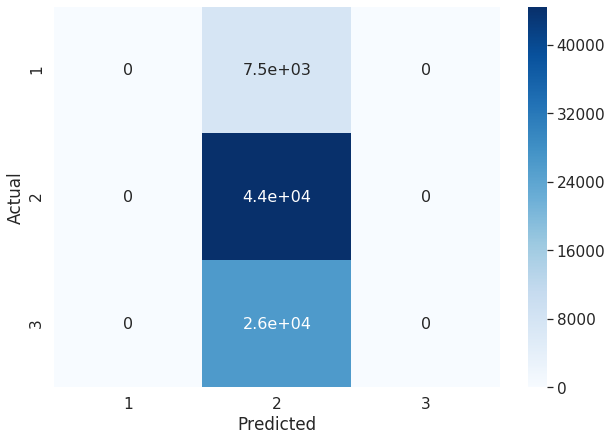

In [23]:
print_confusion_matrix(y_test, predicted_labels)

Random Forest

In [24]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

pred_labels = clf.predict(X_test)

In [25]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, pred_labels))

Accuracy: 0.723372686458


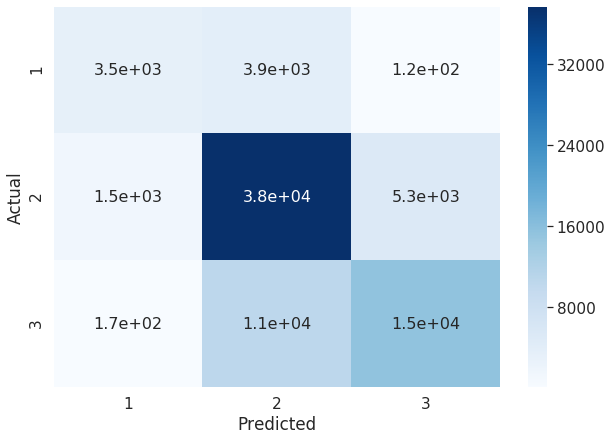

In [26]:
print_confusion_matrix(y_test, pred_labels)

In [27]:
# #Finding Important Features

# feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
# feature_imp

# sns.barplot(x=feature_imp, y=feature_imp.index)
# # Add labels to your graph
# plt.xlabel('Feature Importance Score')
# plt.ylabel('Features')
# plt.title("Visualizing Important Features")
# plt.legend()
# plt.show()

xgBoost